In [1]:
# TimeStamp
import time, datetime
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
print('Last Run: ', st)

Last Run:  2016-01-16 18:41:07


# Showcase

In [2]:
# Run this cell only once
from IPython.display import clear_output
import pandas as pd

%cd ../
clear_output()

pd.set_option('display.max_columns', 9)
pd.set_option('precision', 4)

This file is forked from Demo - Academic 0.1.3.ipynb. All cells above this level are hidden in readthedocs by the `nbsphinx` extension. 

## Outline

- Input data
- Generate plots
- Analyze data

## Input Data

<div class="alert alert-success">**Extensible** - Custom Laminate Theory models.</div>

In [3]:
import lamana as la

%matplotlib inline

Here we define loading parameters and material properties.

![Loading Parameters](../docs/_images/load_params.png)

In [4]:
# Build dicts of loading parameters and and material properties
load_params = {
    'R' : 12e-3,                                           # specimen radius
    'a' : 7.5e-3,                                          # support ring radius
    'r' : 2e-4,                                            # radial distance from center loading
    'P_a' : 1,                                             # applied load
    'p' : 2,                                               # points/layer
}

# Quick Form: a dict of lists
mat_props = {
    'HA' : [5.2e10, 0.25],
    'PSu' : [2.7e9, 0.33],
}

# Select geometries
single_geo = ['400-200-800'] 
multiple_geos = [
    '350-400-500',  '400-200-800', '200-200-1200', '200-100-1400',
    '100-100-1600', '100-200-1400', '300-400-600'
]

## Generate Plots

### Single Geometry Plot

<div class="alert alert-success">**Simple** - Plot with three lines of code.</div>

Now we can plot the previous geometric, loading, material parameters in three lines of code.

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


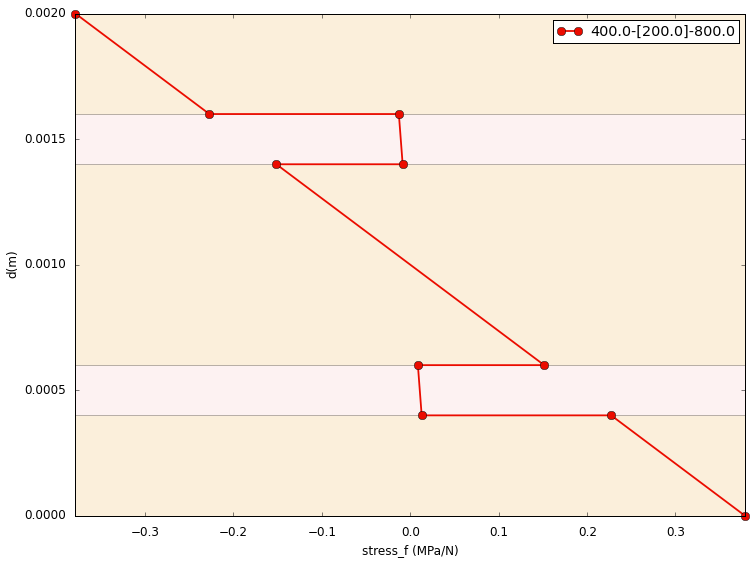

In [5]:
case1 = la.distributions.Case(load_params, mat_props)      # instantiate a User Input Case Object through distributions
case1.apply(single_geo)
case1.plot(normalized=False)

The default normalized plot will be shown and explained later.  For now we invoke the `normalized=False` keyword for demonstration.

Normalized stress distribution (base) with an unnormalized inset:

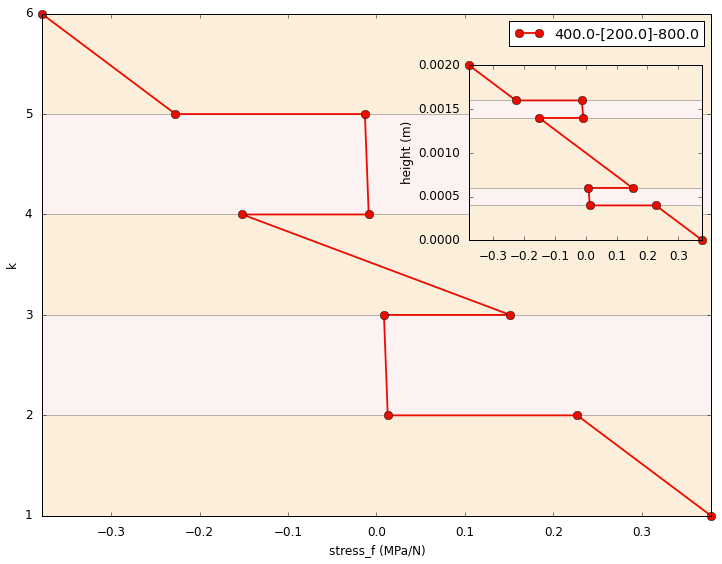

In [6]:
case1.plot(inset=True)

Stress distribution plot with layer annotations:

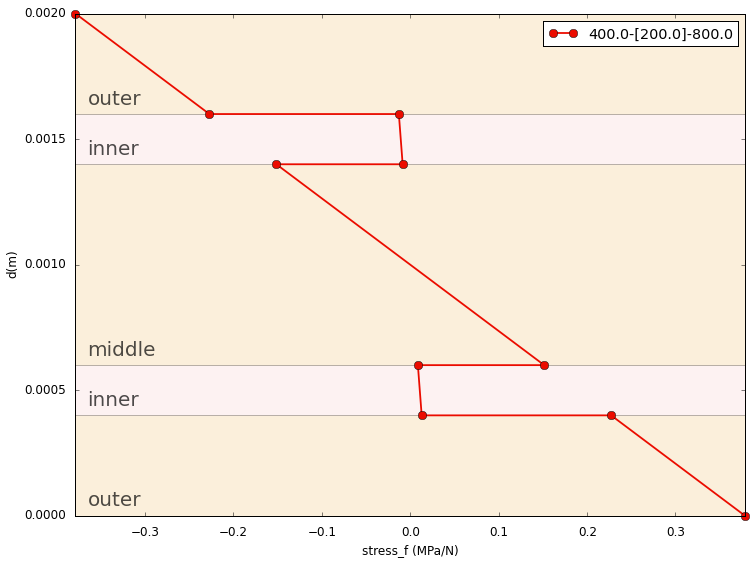

In [7]:
case1.plot(normalized=False, annotate=True)

Custom markerstyles and kwarg passing.

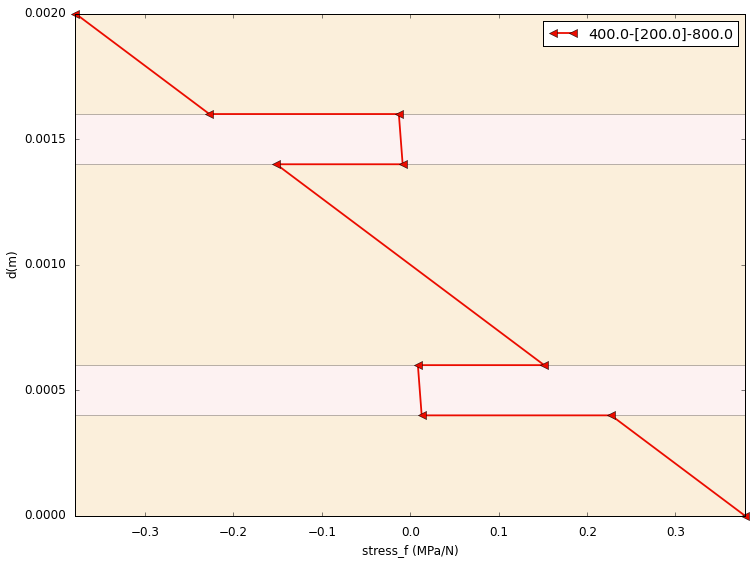

In [8]:
case1.plot(normalized=False, markerstyles=['<'])

Colorblind-safe color palette. 

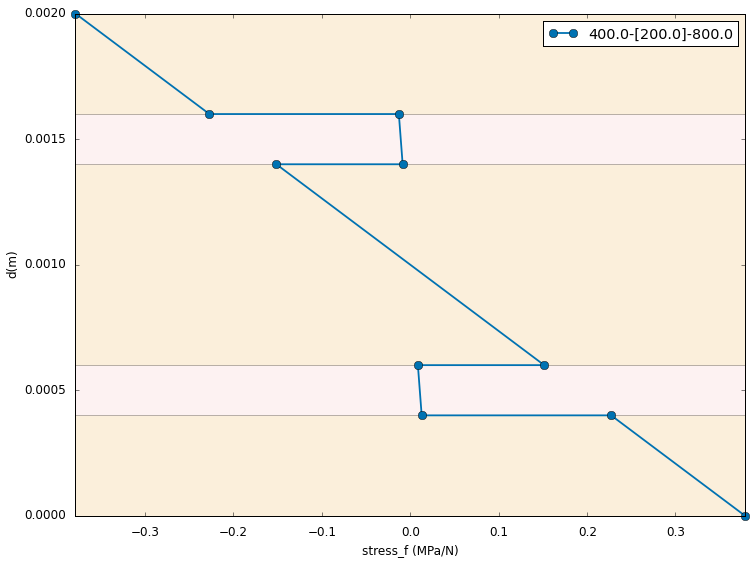

In [9]:
case1.plot(normalized=False, colorblind=True)

Grayscale color palette.

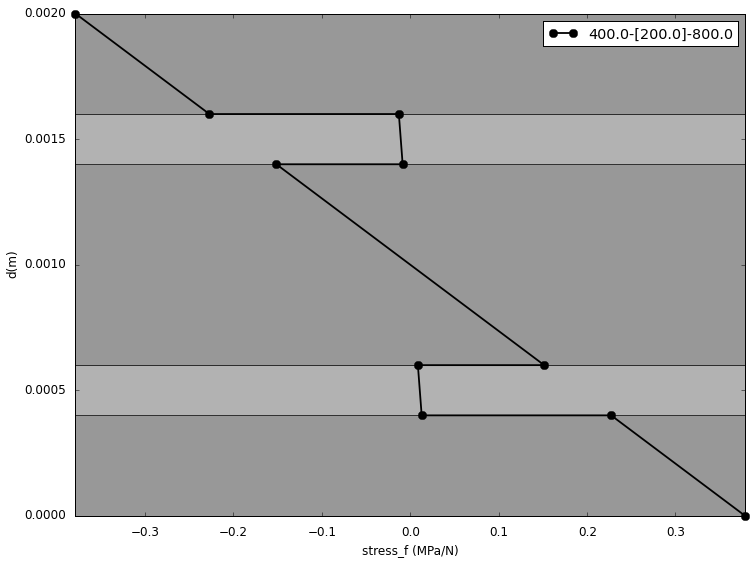

In [10]:
case1.plot(normalized=False, grayscale=True)

### Multiple Geometry Plot

In [11]:
title = 'Stress Distributions of HA/PSu for Multiple Geometries'
multiple_geos = ['350-400-500',  '400-200-800', '200-200-1200', '200-100-1400',
                 '100-100-1600', '100-200-1400', '300-400-600']

It's possible to plot multiple distributions.  It is best to separate plots when viewing them scaled by layer thickness.

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.


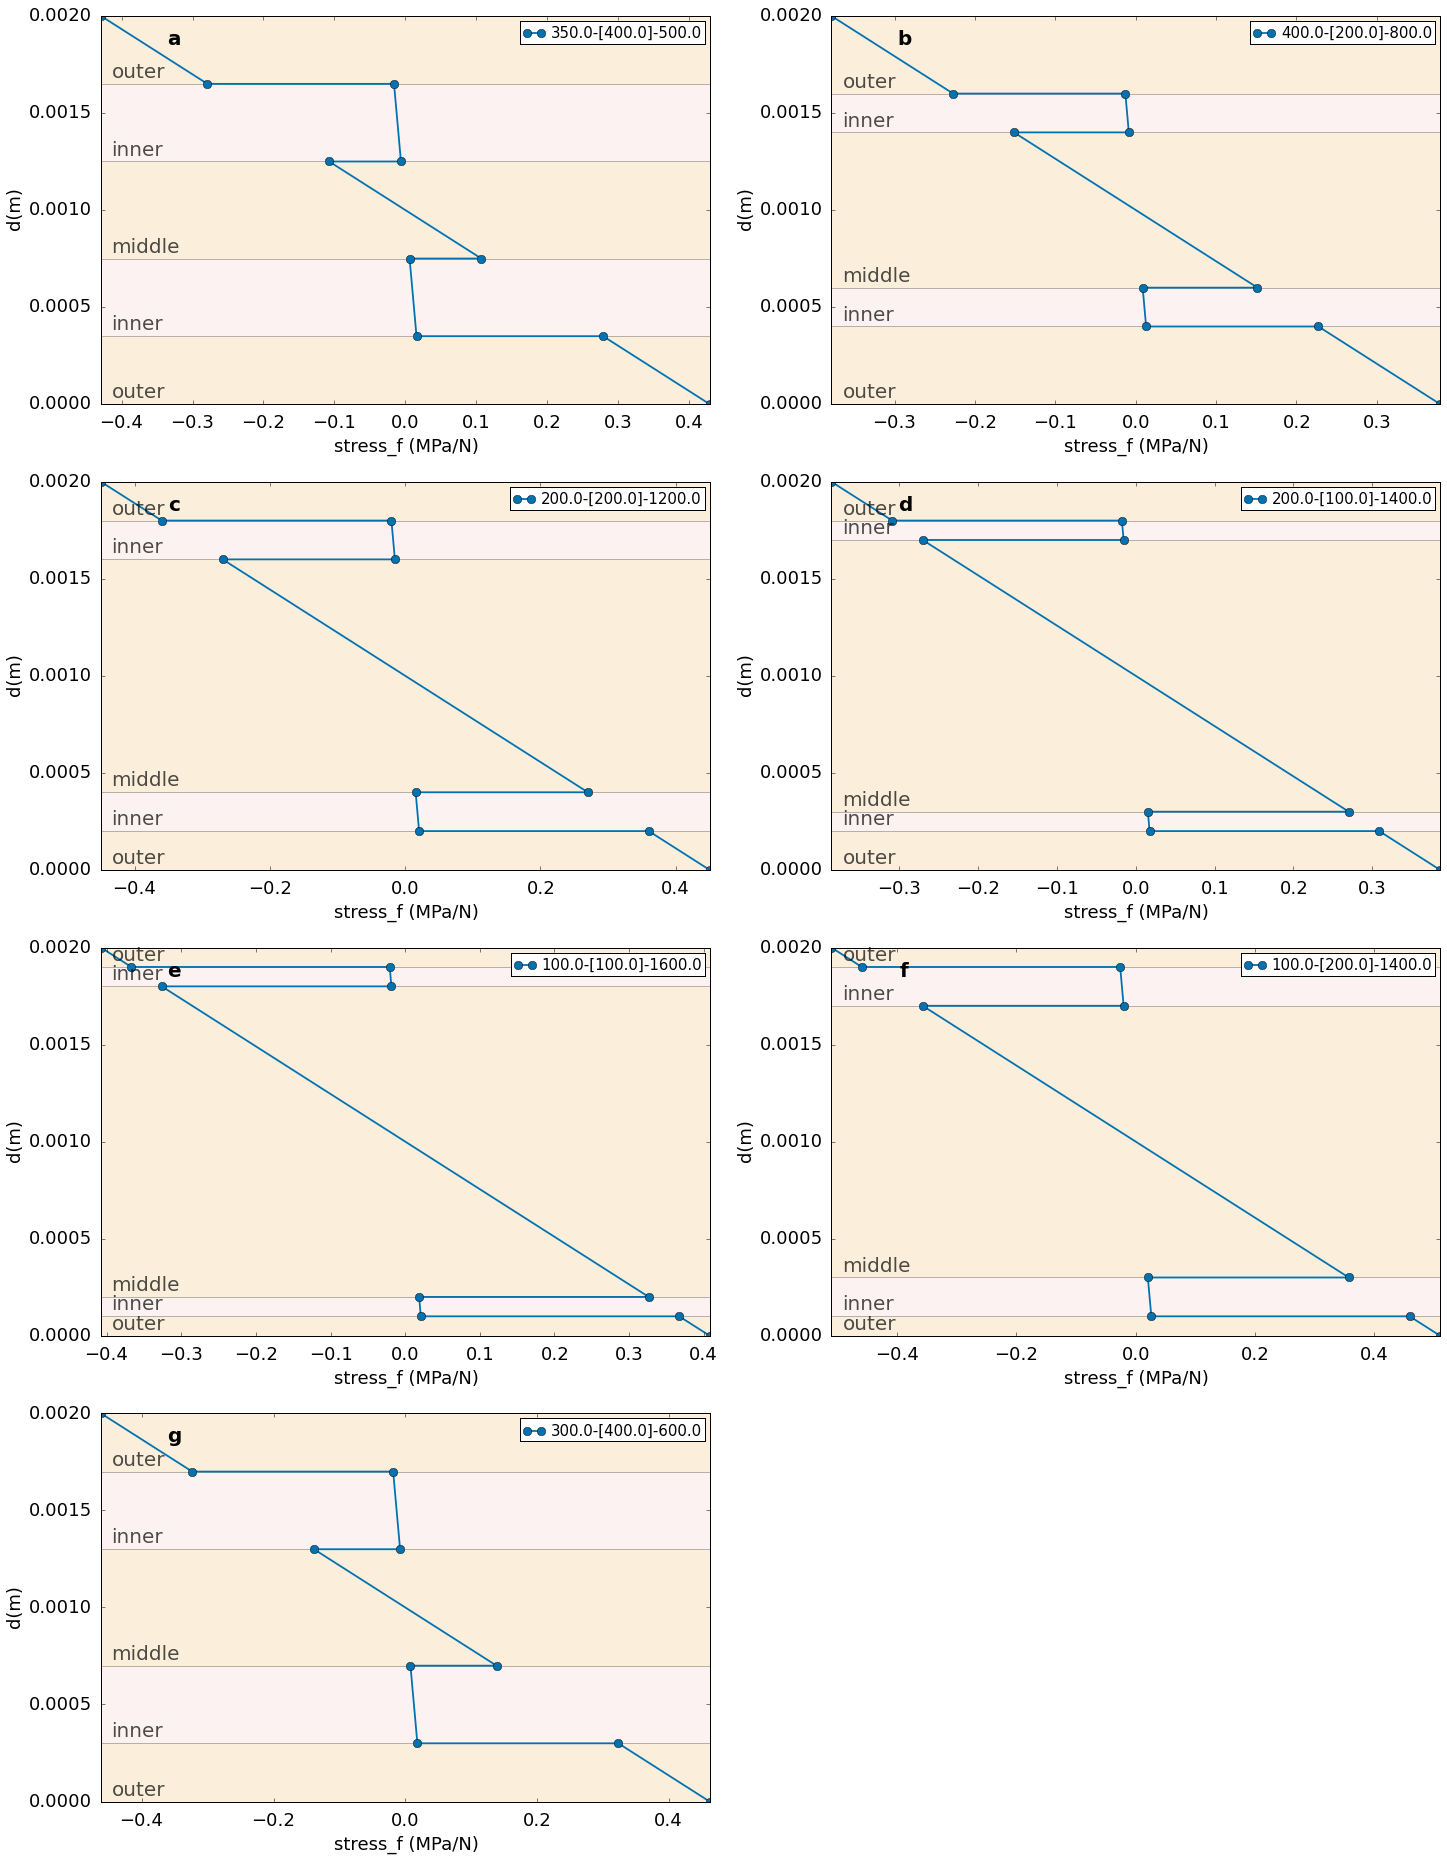

In [12]:
case2 = la.distributions.Case(load_params, mat_props)      # instantiate a User Input Case Object through distributions
case2.apply(multiple_geos)
case2.plot(title, colorblind=True, annotate=True, separate=True)

But LamAna can super-impose for many more geometries onto one plot, again normalizing thickness by k instead of height (d).

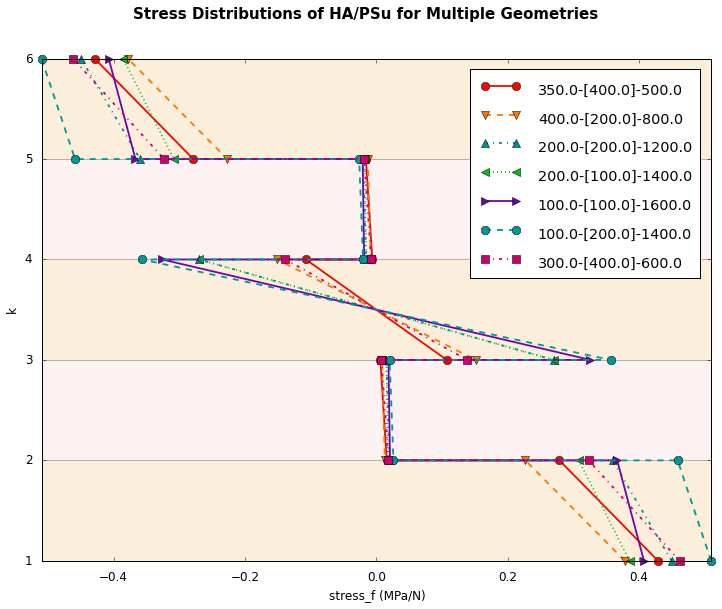

In [13]:
case2.plot(title)

Colorblind-safe and annotations still apply:

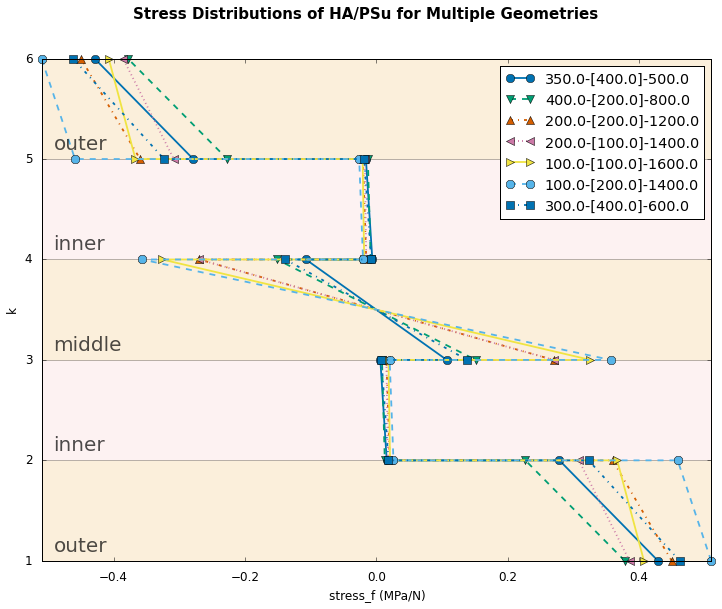

In [14]:
case2.plot(title, colorblind=True, annotate=True)

And grayscale naturally overrides colorblind options:

Grayscale has overriden the colorblind option.


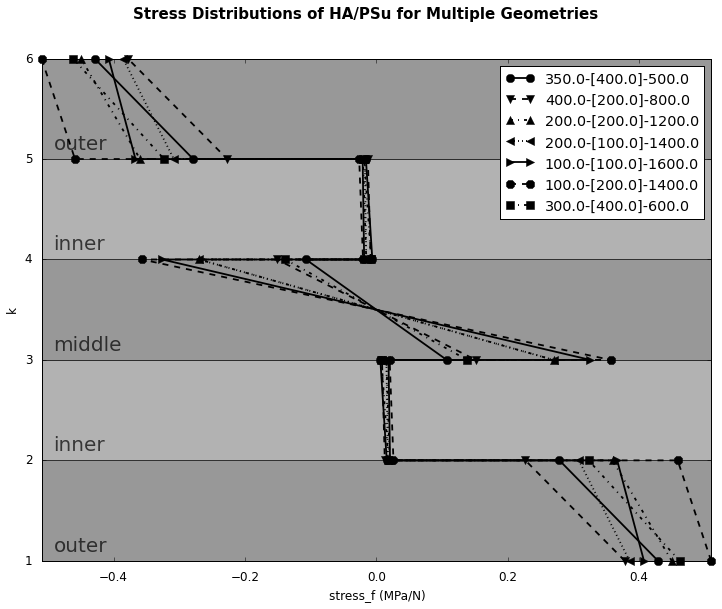

In [15]:
case2.plot(title, colorblind=True, grayscale=True, annotate=True)

#### halfplots

The following has not been implemented yet, but demonstrates the idea of several multi-plots of tensile data. Each plot show cases some pattern of interest.  
    
- (a) constant total thickness; varied layer thicknesses
- (b) constant outer layer
- (c) constant inner layer
- (d) constant middle layer


![halfplots](../docs/_images/halfplots.png)

The latter figure is our expected output.  Each subplot is a halfplot of a separate, mini case, known as a caselet.  Caselets are not implement objects, but rather refer to a collocation of LaminateModels sharing some pattern of interest.  

Multiple caselets are handled by the `distirbutions.Cases()` ::class::.  The `plot()` method for this class exploits the `output_.multiplot()` function which handles multiple plots or subplots.

In [16]:
const_total = ['350-400-500',  '400-200-800', '200-200-1200',
               '200-100-1400', '100-100-1600', '100-200-1400',]
const_outer = ['400-550-100', '400-500-200', '400-450-300',
               '400-400-400', '400-350-500', '400-300-600',
               '400-250-700', '400-200-800', '400-0.5-1199']
const_inner = ['400-400-400', '350-400-500', '300-400-600',
               '200-400-700', '200-400-800', '150-400-990',
               '100-400-1000', '50-400-1100',]
const_middle = ['100-700-400', '150-650-400', '200-600-400',
                '250-550-400', '300-400-500', '350-450-400',
                '400-400-400', '450-350-400', '750-0.5-400']

case1_ = const_total
case2_ = const_outer
case3_ = const_inner
case4_ = const_middle

cases_ = [case1_, case2_, case3_, case4_]

Here we show plotting multiple cases at once.  In this case, the number of points is 2 per layer on the left and 3 per layer on the right.  The default `extrema`-only keyword is turned off to show these extra points.

In [17]:
cases1 = la.distributions.Cases(const_total, load_params=load_params,
                                mat_props=mat_props, model= 'Wilson_LT',
                                ps=[2,3])

Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props to Standard Form.
User input geometries have been converted and set to Case.
Converting mat_props

In [18]:
cases1

<lamana.distributions.Cases object at 0x0000000008F85FD0>, {0: <<class 'lamana.distributions.Case'> p=2, size=1>, 1: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=2, size=1>, 4: <<class 'lamana.distributions.Case'> p=2, size=1>, 5: <<class 'lamana.distributions.Case'> p=2, size=1>, 6: <<class 'lamana.distributions.Case'> p=3, size=1>, 7: <<class 'lamana.distributions.Case'> p=3, size=1>, 8: <<class 'lamana.distributions.Case'> p=3, size=1>, 9: <<class 'lamana.distributions.Case'> p=3, size=1>, 10: <<class 'lamana.distributions.Case'> p=3, size=1>, 11: <<class 'lamana.distributions.Case'> p=3, size=1>}

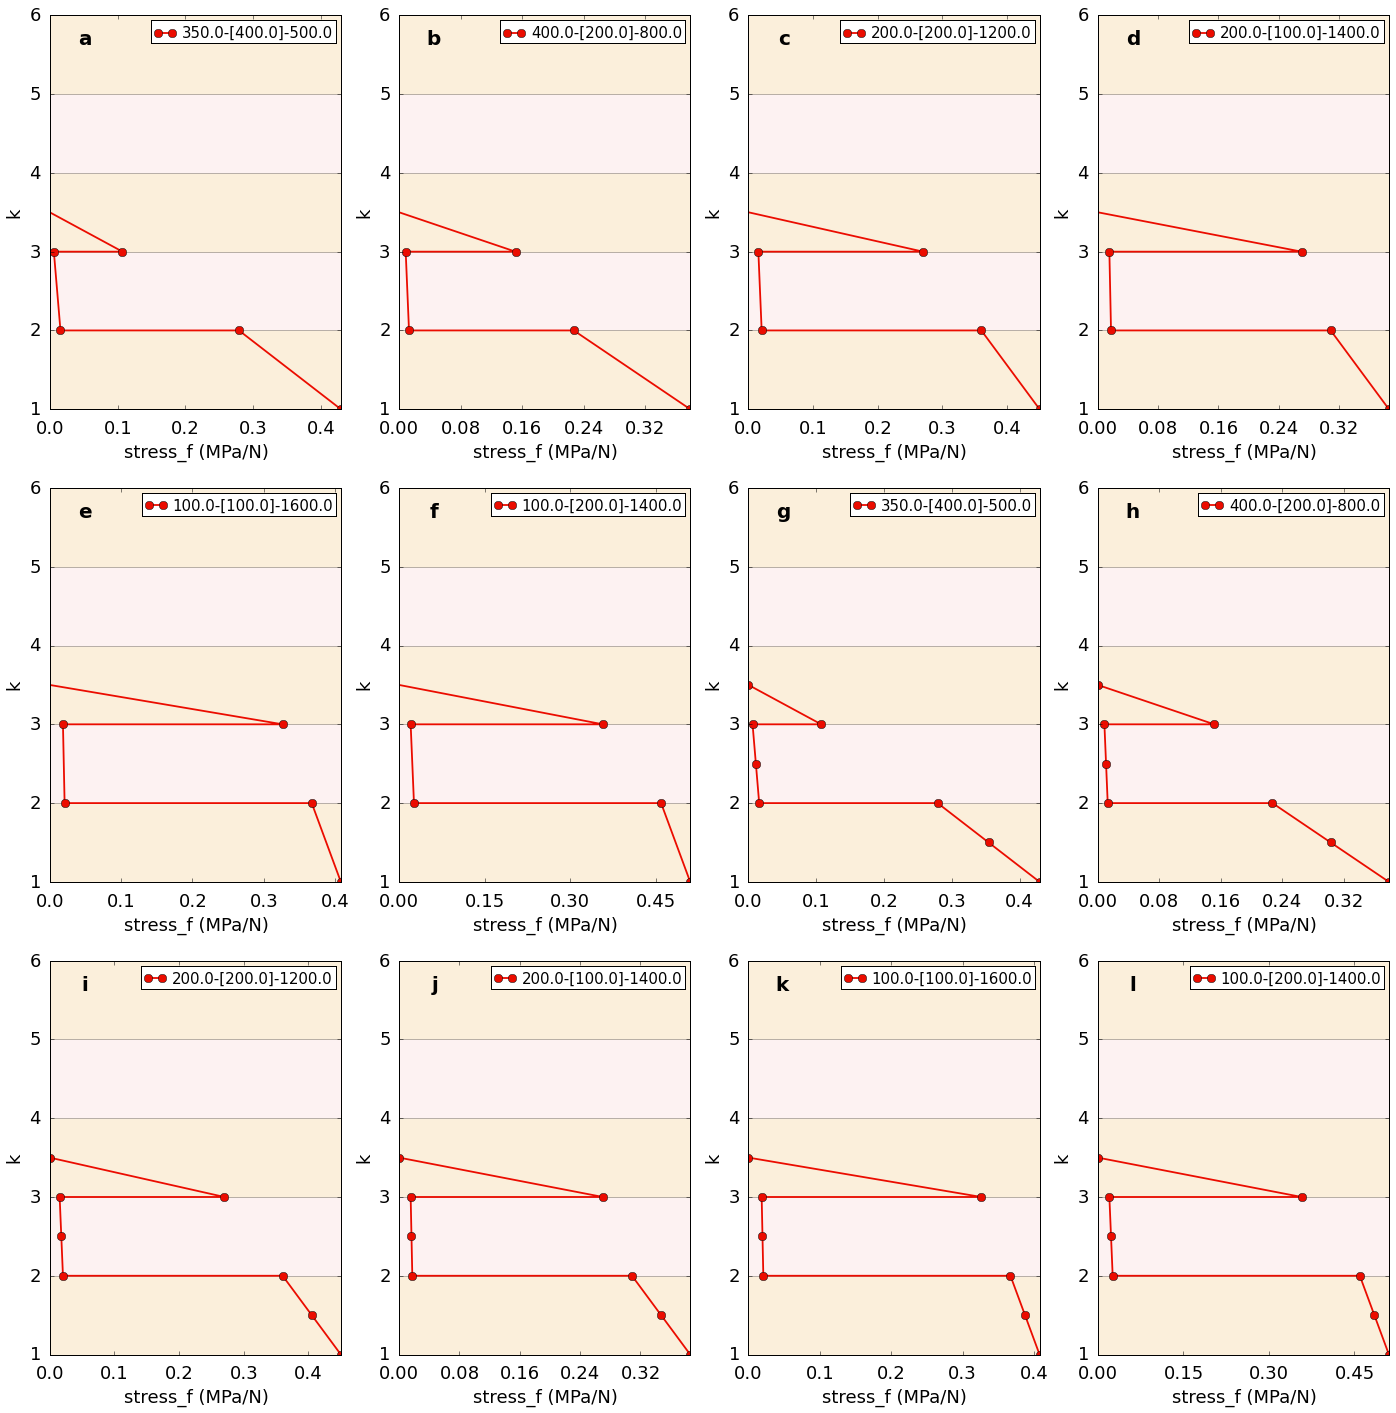

In [19]:
cases1.plot(extrema=False)

In [20]:
'''Demo a Cases plot showing each type of caselet - string, list, case and ps.'''

'Demo a Cases plot showing each type of caselet - string, list, case and ps.'

---

## Analyze Data

### DataFrames

LamAna is built on top of `pandas`, a powerful python library that handles tabular data and analysis. Every geometry input by the user becomes a `pandas` DataFrame object, which opens the user to a plethra of data analytical tools.

In [21]:
case1

<<class 'lamana.distributions.Case'> p=2, size=1>

In [22]:
case1.LMs

[<lamana LaminateModel object (400.0-[200.0]-800.0), p=2>]

In [23]:
#df = case1.frames
df = case1.frames[0]
df

Accessing frames method.


,layer,side,type,matl,...,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
0,1,Tens.,outer,HA,...,5.965e-06,274182.824,378730.663,0.379
1,1,Tens.,outer,HA,...,3.579e-06,164509.695,227238.398,0.227
2,2,Tens.,inner,PSu,...,3.579e-06,9854.181,12915.334,0.013
3,2,Tens.,inner,PSu,...,2.386e-06,6569.454,8610.223,0.009
4,3,Tens.,middle,HA,...,2.386e-06,109673.130,151492.265,0.151
5,3,Comp.,middle,HA,...,-2.386e-06,-109673.130,-151492.265,-0.151
6,4,Comp.,inner,PSu,...,-2.386e-06,-6569.454,-8610.223,-0.009
7,4,Comp.,inner,PSu,...,-3.579e-06,-9854.181,-12915.334,-0.013
8,5,Comp.,outer,HA,...,-3.579e-06,-164509.695,-227238.398,-0.227
9,5,Comp.,outer,HA,...,-5.965e-06,-274182.824,-378730.663,-0.379
